In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
seaborn.set(style='ticks')

import cPickle as pickle
import scipy
import sklearn
import mpld3

In [2]:
import sklearn.manifold

In [3]:
def get_song_names():
    
    song_names = pd.read_json('/home/bmcfee/git/playlist_recommender/data/valid_songs.json', orient='index')
    song_names.index.name = 'song_id'
    return song_names

In [61]:
from mpld3 import utils, plugins

class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id", "labels"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        var labels = this.props.labels;
        obj.elements().on("mousedown",
                          function(d, i){
                              window.open("http://www.artofthemix.org/members/" + encodeURIComponent(labels[i]) + "/mixes" );
                              //alert("clicked on points[" + i + "] = " + labels[i]);
                            });
    }
    """
    def __init__(self, points, labels):
        self.dict_ = {"type": "clickinfo",
                      "id": utils.get_id(points),
                      "labels": labels}
        


In [4]:
song_names = get_song_names()

In [5]:
with open('../../data/playlist_analysis_data_alpha0.5_2.pickle', mode='r') as fdesc:
    vars().update(**pickle.load(fdesc))

In [14]:
try:
    p_egu = p_egu.drop('[UNIFORM]', axis=1)
except:
    pass

In [35]:
T = sklearn.manifold.TSNE(verbose=2)

In [36]:
# T-SNE on ppk embedding of edge distribution?
T.fit(p_egu**0.5)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1187
[t-SNE] Computed conditional probabilities for sample 1187 / 1187
[t-SNE] Mean sigma: 0.082662
[t-SNE] Iteration 10: error = 22.8937540, gradient norm = 0.0822512
[t-SNE] Iteration 20: error = 21.0841319, gradient norm = 0.0810841
[t-SNE] Iteration 30: error = 19.9859729, gradient norm = 0.0868133
[t-SNE] Iteration 32: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Iteration 40: error = 21.0712417, gradient norm = 0.0811591
[t-SNE] Iteration 50: error = 20.8963282, gradient norm = 0.0712913
[t-SNE] Iteration 60: error = 20.9844173, gradient norm = 0.0709393
[t-SNE] Iteration 65: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 65 iterations with early exaggeration: 21.062594
[t-SNE] Iteration 70: error = 2.7905939, gradient norm = 0.0176473
[t-SNE] Iteration 80: error = 2.0026654, gradient norm = 0.0116385
[t-SNE] Iterat

In [37]:
user_embedding = pd.DataFrame(index=p_egu.index, data=T.embedding_)

In [38]:
user_embedding.to_excel('../../data/user_embedding_tsne.xls')

In [39]:
mpld3.enable_notebook()
#mpld3.disable_notebook()

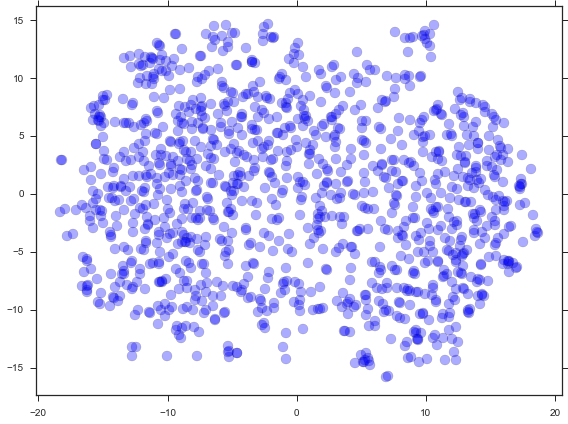

In [64]:
fig = plt.figure(figsize=(8,6))
scatman = plt.scatter(T.embedding_[:, 0], T.embedding_[:, 1], s=100, alpha=0.33)

mpld3.plugins.connect(fig, plugins.PointLabelTooltip(scatman, labels=list(p_egu.index)))
mpld3.plugins.connect(fig, ClickInfo(scatman, labels=list(p_egu.index)))

plt.axis('tight')
plt.tight_layout()

In [65]:
def get_user(playlists, song_names, user):
    
    return playlists.loc[[user]].join(song_names, on='song_id')

In [62]:
get_user(playlists_test, song_names, 'monkfeesh')

category             song_id  \
user      mix_id segment_id segment_position                                    
monkfeesh 9007   1          0                 Mixed Genre  SONYELH12AF72A2C15   
                            1                 Mixed Genre  SOKVLAN12A8C13E539   
                 2          0                 Mixed Genre  SOYHCED12A6701EB78   
                            1                 Mixed Genre  SOZJULR12AF729D135   
                            2                 Mixed Genre  SOSZWZM12A8C139C29   
                            3                 Mixed Genre  SOCRHFJ12A67021D74   
                 4          0                 Mixed Genre  SOTOHHT12A6D4F957B   
                 5          0                 Mixed Genre  SOZSSUB12A58A7C965   
          9008   0          0                 Mixed Genre  SOFWYKO12A8C13D47B   
                 1          0                 Mixed Genre  SOYWQSL12A67020A21   
                            1                 Mixed Genre  SOIVBCQ12A8C1386E1   
                            2                 Mixed Genre  SOGDKEK12AF72A193B   
                            3                 Mixed Genre  SOBCZQE12AB01850F7   
                 2          0                 Mixed Genre  SORIKGD12AB018F973   
                 3          0                 Mixed Genre  SONRRYX12AB017D270   
                 4          0                 Mixed Genre  SODYWBD12A8C139845   
                            1                 Mixed Genre  SOXQVAV12AB01807C0   
                            2                 Mixed Genre  SOCTVUN12A6D4F8FA6   
                 5          0                 Mixed Genre  SONIRXX12AB01853C3   
                            1                 Mixed Genre  SOGJMTM12A6310E17B   
                            2                 Mixed Genre  SODTGPN12B0B807C32   
          9009   0          0                 Mixed Genre  SODPAMX12A58A7DE00   
                            1                 Mixed Genre  SOTFJYO12A8C1366C8   
                            2                 Mixed Genre  SODDKAY12AB018379E   
                 1          0                 Mixed Genre  SOPKWEY12A67020C3B   
                            1                 Mixed Genre  SOKJQFF12A8C1360FD   
                 2          0                 Mixed Genre  SOBNTMC12A6D4FA422   
                 3          0                 Mixed Genre  SOAOCQI12A6D4F77C3   
                            1                 Mixed Genre  SODLENQ12AF72A3DA9   
                 4          0                 Mixed Genre  SODJMPP12A670214B8   
          9010   0          0                  Indie Rock  SOZGZSF12A58A7B222   
                            1                  Indie Rock  SONELFC12A6D4F8FEB   
                            2                  Indie Rock  SOHQQBS12A6D4F8FED   
                            3                  Indie Rock  SOKBRAQ12A6D4F8FEC   
                            4                  Indie Rock  SOAFNTP12A6D4FBCE5   
                 1          0                  Indie Rock  SOVRLJU12A58A76340   
                            1                  Indie Rock  SOXRJCZ12AB017FB00   
                            2                  Indie Rock  SOMVRZB12A8C13A027   
                 2          0                  Indie Rock  SOPYJVT12A6D4F8FF3   
                            1                  Indie Rock  SOMCVYX12A58A791ED   
                 3          0                  Indie Rock  SOGXGWF12A58A792F3   

                                                 timestamp  \
user      mix_id segment_id segment_position                 
monkfeesh 9007   1          0                 980231040000   
                            1                 980231040000   
                 2          0                 980231040000   
                            1                 980231040000   
                            2                 980231040000   
                            3                 980231040000   
                 4          0                 980231040000   
       

In [61]:
get_user(playlists_test, song_names, 'Wilkie')

category             song_id  \
user   mix_id segment_id segment_position                                   
Wilkie 3781   0          0                 Indie Rock  SOLDGHZ12AB01866D9   
              1          0                 Indie Rock  SODYWBD12A8C139845   
              2          0                 Indie Rock  SOBSIEC12A6D4FA6B0   
                         1                 Indie Rock  SOSEBUB12A6D4F84DF   
              3          0                 Indie Rock  SOLGIKY12AC9075901   
              4          0                 Indie Rock  SOOQQDQ12A8AE47CA9   
              5          0                 Indie Rock  SOLMGCH12A8AE47BC1   
                         1                 Indie Rock  SOFRJPX12AB017BB87   
                         2                 Indie Rock  SOTLMEP12A6D4F78F0   
       3793   0          0                      Theme  SOLHVIS12A8AE46BFB   
                         1                      Theme  SOJDGZO12AC960D94F   
              1          0                      Theme  SOAWYLY12AB0184004   
                         1                      Theme  SOANOOY12A6D4F58CE   
              2          0                      Theme  SOMLBRK12A67020A71   
       21805  0          0                 Indie Rock  SOKLQRE12A58A7BB97   
                         1                 Indie Rock  SOPXLWJ12A8C132639   
                         2                 Indie Rock  SORWLTW12A670208FA   
                         3                 Indie Rock  SOQMCKB12A6D4F7D74   
                         4                 Indie Rock  SOKJSKZ12A8C14289A   
                         5                 Indie Rock  SOPMBGG12A8C13ABF1   
                         6                 Indie Rock  SOJYGHC12A6701CD7C   
              1          0                 Indie Rock  SOLHQKM12A6310DF56   
              2          0                 Indie Rock  SOZJULR12AF729D135   
       22215  0          0                 Indie Rock  SOPLYJH12A6701F956   
              1          0                 Indie Rock  SOHPETF12A8C1311E0   
                         1                 Indie Rock  SOEXHUD12A6D4F72D5   
                         2                 Indie Rock  SOJVQWN12AB0187D69   
              2          0                 Indie Rock  SONEPPU12A58A7EB97   
              3          0                 Indie Rock  SOCKJVP12A6D4F920C   
                         1                 Indie Rock  SOQIADE12A8C140E49   
                         2                 Indie Rock  SOJZDAP12A8C132B44   
                         3                 Indie Rock  SOPTQJU12A6D4F96A5   
                         4                 Indie Rock  SOERGNH12A8C131F99   
                         5                 Indie Rock  SOUVXKA12A8C1363ED   
       32337  0          0                 Indie Rock  SOKLQRE12A58A7BB97   
                         1                 Indie Rock  SODGPPX12A8C13A167   
              1          0                 Indie Rock  SOYWQSL12A67020A21   
              2          0                 Indie Rock  SOQLFRX12A6D4F9200   
                         1                 Indie Rock  SOPWBHC12AF72A7B35   

                                               timestamp  \
user   mix_id segment_id segment_position                  
Wilkie 3781   0          0                  951822240000   
              1          0                  951822240000   
              2          0                  951822240000   
                         1                  951822240000   
              3          0                  951822240000   
              4          0                  951822240000   
              5          0                  951822240000   
                         1                  951822240000   
                         2                  951822240000   
       3793   0          0                  951909660000   
                         1                  951909660000   
              1          0                  951909660000   
                         1                  951

In [56]:
get_user(playlists_test, song_names, 'Bachman')

category  \
user    mix_id segment_id segment_position                     
Bachman 2626   0          0                            Theme   
               1          0                            Theme   
                          1                            Theme   
                          2                            Theme   
                          3                            Theme   
               2          0                            Theme   
               3          0                            Theme   
               4          0                            Theme   
               5          0                            Theme   
        2627   0          0                            Theme   
               1          0                            Theme   
               2          0                            Theme   
               3          0                            Theme   
               4          0                            Theme   
               5          0                            Theme   
               6          0                            Theme   
        2673   0          0                      Mixed Genre   
               1          0                      Mixed Genre   
               2          0                      Mixed Genre   
                          1                      Mixed Genre   
               3          0                      Mixed Genre   
                          1                      Mixed Genre   
        2679   1          0                            Theme   
                          1                            Theme   
               2          0                            Theme   
               3          0                            Theme   
                          1                            Theme   
                          2                            Theme   
               4          0                            Theme   
                          1                            Theme   
...                                                      ...   
        5854   4          1                 Rhythm and Blues   
                          2                 Rhythm and Blues   
                          3                 Rhythm and Blues   
               5          0                 Rhythm and Blues   
                          1                 Rhythm and Blues   
                          2                 Rhythm and Blues   
                          3                 Rhythm and Blues   
        6257   0          0                            Theme   
               2          0                            Theme   
                          1                            Theme   
                          2                            Theme   
               3          0                            Theme   
               4          0                            Theme   
               5          0                            Theme   
                          1                            Theme   
                          2                            Theme   
                          3                            Theme   
                          4                            Theme   
               6          0                            Theme   
        7119   0          0                         Rock/Pop   
                          1                         Rock/Pop   
               1          0                         Rock/Pop   
                          1                         Rock/Pop   
               2          0                         Rock/Pop   
                          1                         Rock/Pop   
                          2                         Rock/Pop   
               3          0                         Rock/Pop   
               4          0                         Rock/Pop   
               5          0                         Rock/Pop   
                          1                         Rock/Pop   

                   

In [57]:
get_user(playlists_test, song_names, 'Mo Twang!')

category             song_id  \
user      mix_id segment_id segment_position                                    
Mo Twang! 12681  0          0                     Country  SOORMZJ12A81C22FEC   
                 1          0                     Country  SOENDQX12A8C1319E3   
                 2          0                     Country  SOSKYCF12A6D4F9A1B   
                            1                     Country  SOTOCLM12A8C1352F2   
                 3          0                     Country  SOBNDLO12AF72A254C   
                 5          0                     Country  SOEPPRI12A6D4F6F6F   
                            1                     Country  SOQGPMG12A6701E12F   
                 6          0                     Country  SODIDHX12A8C13C43E   
                 7          0                     Country  SOCLANU12A6D4F8F1A   
          13238  0          0                   Road Trip  SORLFTB12AB0185F7F   
                            1                   Road Trip  SOKHDOU12A6D4F8085   
                 1          0                   Road Trip  SOYRTIH12A8C13DE14   
                            1                   Road Trip  SOCCXYC12A8C142754   
                 2          0                   Road Trip  SODABWH12A58A78E68   
                 3          0                   Road Trip  SODNYXG12A6D4FAC69   
                            1                   Road Trip  SOKBAMP12A6D4F8F22   
          13284  1          0                   Road Trip  SOJCRUY12A67ADA4C2   
                            1                   Road Trip  SOWKXVW12A6D4F9FD5   
                            2                   Road Trip  SONZWPB12A8C135513   
                 2          0                   Road Trip  SOFNNZU12A58A792F5   
                            1                   Road Trip  SOUFTRV12AB017F242   
                            2                   Road Trip  SOLHAOE12A6D4F8233   
                 3          0                   Road Trip  SOODXCT12A8C137B48   
                            1                   Road Trip  SOFFQZK12A8C1324AC   
                            2                   Road Trip  SOFRCHU12A8C13F96B   
                            3                   Road Trip  SOUPTDA12A8C1323F6   
                            4                   Road Trip  SOVTECQ12A8C13A1B8   
                            5                   Road Trip  SODTFGU12A8C132454   
          14064  0          0                       Blues  SOXXDTT12A6D4F96D3   
                            1                       Blues  SOFEXUP12AC9070E91   
...                                                   ...                 ...   
          74218  1          0                       Blues  SOTFZOT12AB0181CD9   
                 2          0                       Blues  SOGRMZA12A670206FC   
                 4          0                       Blues  SOKYCNY12A6D4F74F5   
                 5          0                       Blues  SOXHNCP12AB0181FBA   
                 6          0                       Blues  SOHVLAD12A8C132F6B   
                            1                       Blues  SOONFUB12A6D4FC1A8   
                 7          0                       Blues  SOBOWZC12A6701DD34   
                 8          0                       Blues  SONLJMG12AF72A0F53   
          94524  0          0                 Mixed Genre  SOWKXZP12A8C141FFD   
                 1          0                 Mixed Genre  SOPZEDC12AB0185496   
                 2          0                 Mixed Genre  SOMXKNW12A8C141932   
                 3          0                 Mixed Genre  SOILDWN12A8AE47A10   
                            1                 Mixed Genre  SOJJDDT12A8C136226   
                 4          0                 Mixed Genre  SOSPPJW12A6D4F6FCC   
                            1                 Mixed Genre  SOAIXCB12A6D4F91AB   
                 5          0                 Mixed Genre  SOUPEHT12A6D4F8F30   
          98142  0          0                 Mixed Genre  SOYMSFY12AB018F04A   

In [52]:
get_user(playlists_test, song_names, 'tomdobb')

category  \
user    mix_id segment_id segment_position                   
tomdobb 12997  0          0                    Mixed Genre   
               1          0                    Mixed Genre   
               2          0                    Mixed Genre   
               3          0                    Mixed Genre   
               4          0                    Mixed Genre   
               5          0                    Mixed Genre   
               6          0                    Mixed Genre   
               7          0                    Mixed Genre   
               8          0                    Mixed Genre   
        13596  0          0                       Romantic   
                          1                       Romantic   
                          2                       Romantic   
                          3                       Romantic   
               1          0                       Romantic   
               2          0                       Romantic   
                          1                       Romantic   
        17403  0          0                          Theme   
                          1                          Theme   
                          2                          Theme   
                          3                          Theme   
                          4                          Theme   
               2          0                          Theme   
                          1                          Theme   
               4          0                          Theme   
        19601  0          0                       Romantic   
               1          0                       Romantic   
               2          0                       Romantic   
               3          0                       Romantic   
               4          0                       Romantic   
               5          0                       Romantic   
...                                                    ...   
        66469  6          0                    Mixed Genre   
        68637  0          0                    Mixed Genre   
               1          0                    Mixed Genre   
               2          0                    Mixed Genre   
               3          0                    Mixed Genre   
               4          0                    Mixed Genre   
                          1                    Mixed Genre   
                          2                    Mixed Genre   
        69489  0          0                    Mixed Genre   
               1          0                    Mixed Genre   
                          1                    Mixed Genre   
                          2                    Mixed Genre   
               3          0                    Mixed Genre   
                          1                    Mixed Genre   
                          2                    Mixed Genre   
               4          0                    Mixed Genre   
        81760  0          0                 Alternating DJ   
                          1                 Alternating DJ   
                          2                 Alternating DJ   
                          3                 Alternating DJ   
                          4                 Alternating DJ   
                          5                 Alternating DJ   
                          6                 Alternating DJ   
                          7                 Alternating DJ   
               1          0                 Alternating DJ   
               2          0                 Alternating DJ   
                          1                 Alternating DJ   
                          2                 Alternating DJ   
               3          0                 Alternating DJ   
                          1                 Alternating DJ   

                                                       song_id      timestamp  \
user    mix_id segment_id segment_position                    

In [53]:
get_user(playlists_test, song_names, 'DJ Shady12')

category  \
user       mix_id segment_id segment_position                
DJ Shady12 17329  0          0                 Mixed Genre   
                             1                 Mixed Genre   
                             2                 Mixed Genre   
                  1          0                 Mixed Genre   
                             1                 Mixed Genre   
           17330  0          0                 Mixed Genre   
                             1                 Mixed Genre   
                             2                 Mixed Genre   
                  1          0                 Mixed Genre   
                             1                 Mixed Genre   
           17593  1          0                 Mixed Genre   
                  2          0                 Mixed Genre   
                             1                 Mixed Genre   
                  3          0                 Mixed Genre   
                             1                 Mixed Genre   
                             2                 Mixed Genre   
                  4          0                 Mixed Genre   
                  5          0                 Mixed Genre   
                  6          0                 Mixed Genre   
                             1                 Mixed Genre   
           17594  1          0                 Mixed Genre   
                  2          0                 Mixed Genre   
                             1                 Mixed Genre   
                  3          0                 Mixed Genre   
                             1                 Mixed Genre   
                             2                 Mixed Genre   
                  4          0                 Mixed Genre   
                  5          0                 Mixed Genre   
                  6          0                 Mixed Genre   
                             1                 Mixed Genre   
...                                                    ...   
           17595  3          2                 Mixed Genre   
                  4          0                 Mixed Genre   
                  5          0                 Mixed Genre   
                  6          0                 Mixed Genre   
                             1                 Mixed Genre   
           18658  0          0                     Hip Hop   
                             1                     Hip Hop   
                  1          0                     Hip Hop   
                  2          0                     Hip Hop   
           21756  0          0                   Road Trip   
                             1                   Road Trip   
                  1          0                   Road Trip   
                  2          0                   Road Trip   
                  3          0                   Road Trip   
                  4          0                   Road Trip   
                             1                   Road Trip   
           21758  0          0                 Mixed Genre   
                  1          0                 Mixed Genre   
                  2          0                 Mixed Genre   
                             1                 Mixed Genre   
                             2                 Mixed Genre   
                             3                 Mixed Genre   
           22410  1          0                     Hip Hop   
                             1                     Hip Hop   
                  2          0                     Hip Hop   
           23127  0          0                     Hip Hop   
                  1          0                     Hip Hop   
                  2          0                     Hip Hop   
           29765  0          0                     Hip Hop   
                  1          0                     Hip Hop   

                                                          song_id  \
user       mix_id segment_id segment_position                       
DJ Sh

In [54]:
get_user(playlists_test, song_names, 'DJ Shady123')

category  \
user        mix_id segment_id segment_position                
DJ Shady123 12468  0          0                     Hip Hop   
                   1          0                     Hip Hop   
                   2          0                     Hip Hop   
                              1                     Hip Hop   
                              2                     Hip Hop   
                   3          0                     Hip Hop   
            12472  0          0                     Hip Hop   
                   1          0                     Hip Hop   
                              1                     Hip Hop   
                              2                     Hip Hop   
                              3                     Hip Hop   
                   2          0                     Hip Hop   
                   3          0                     Hip Hop   
                              1                     Hip Hop   
            12473  0          0                     Hip Hop   
                   1          0                     Hip Hop   
                   2          0                     Hip Hop   
                              1                     Hip Hop   
            12498  0          0                     Hip Hop   
                              1                     Hip Hop   
                   1          0                     Hip Hop   
                              1                     Hip Hop   
                   2          0                     Hip Hop   
                              1                     Hip Hop   
            14868  0          0                     Hip Hop   
                              1                     Hip Hop   
                              2                     Hip Hop   
                   1          0                     Hip Hop   
                   2          0                     Hip Hop   
                              1                     Hip Hop   
                   3          0                     Hip Hop   
                   4          0                     Hip Hop   
                   5          0                     Hip Hop   
                              1                     Hip Hop   
                   6          0                     Hip Hop   
            14995  0          0                    Rock/Pop   
                              1                    Rock/Pop   
                              2                    Rock/Pop   
                   1          0                    Rock/Pop   
                   2          0                    Rock/Pop   
                   3          0                    Rock/Pop   
                              1                    Rock/Pop   
                   4          0                    Rock/Pop   
                   5          0                    Rock/Pop   
            14998  1          0                 Mixed Genre   
                   2          0                 Mixed Genre   
                   3          0                 Mixed Genre   
                              1                 Mixed Genre   

                                                           song_id  \
user        mix_id segment_id segment_position                       
DJ Shady123 12468  0          0                 SOKWNCS12A8C135C99   
                   1          0                 SOWYGDD12A8C13C666   
                   2          0                 SOYRPWD12A8C135B01   
                              1                 SOEFLLL12AF72A15EA   
                              2                 SOFAGIT12A8C132733   
                   3          0                 SOMXTFT12A8C13338F   
            12472  0          0                 SOUBNIO12A6D4F851D   
                   1          0                 SOMXTFT12A8C13338F   
                              1                 SOYRPWD12A8C135B01   
                              2                 SOEFLLL12AF72A15EA   
                              3                 SOVFMSF12A63